In [2]:
from ipywidgets import Layout
from IPython.display import Javascript, HTML
import ipywidgets as widgets

In [3]:
import json 
from PIL import Image, ImageDraw
from IPython.display import display
from shapely import wkt

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# Opening and loading polygons from label json 
path_to_label_value = '/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000030_pre_disaster.json'
path_to_image_value ='/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/images/santa-rosa-wildfire_00000030_pre_disaster.png'
path_to_mask_value = '/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/masks/santa-rosa-wildfire_00000030_pre_disaster.png'

with open(path_to_label_value, 'rb') as image_json_file:
    image_json = json.load(image_json_file)

coords = image_json['features']['xy']
wkt_polygons = []

for coord in coords:
    if 'subtype' in coord['properties']:
        damage = coord['properties']['subtype']
    else:
        damage = 'no-damage'
    wkt_polygons.append((damage, coord['wkt']))
    
polygons = []

for damage, swkt in wkt_polygons:
    polygons.append((damage, wkt.loads(swkt)))

# Loading image
img = Image.open(path_to_image_value)

mask = Image.open(path_to_mask_value)

draw = ImageDraw.Draw(img, 'RGBA')
mask
damage_dict = {
    "no-damage": (0, 255, 0, 100),
    "minor-damage": (0, 0, 255, 125),
    "major-damage": (255, 69, 0, 125),
    "destroyed": (255, 0, 0, 125),
    "un-classified": (255, 255, 255, 125)
}

for damage, polygon in polygons:
    x,y = polygon.exterior.coords.xy
    coords = list(zip(x,y))
    draw.polygon(coords, damage_dict[damage])

del draw

display(img)

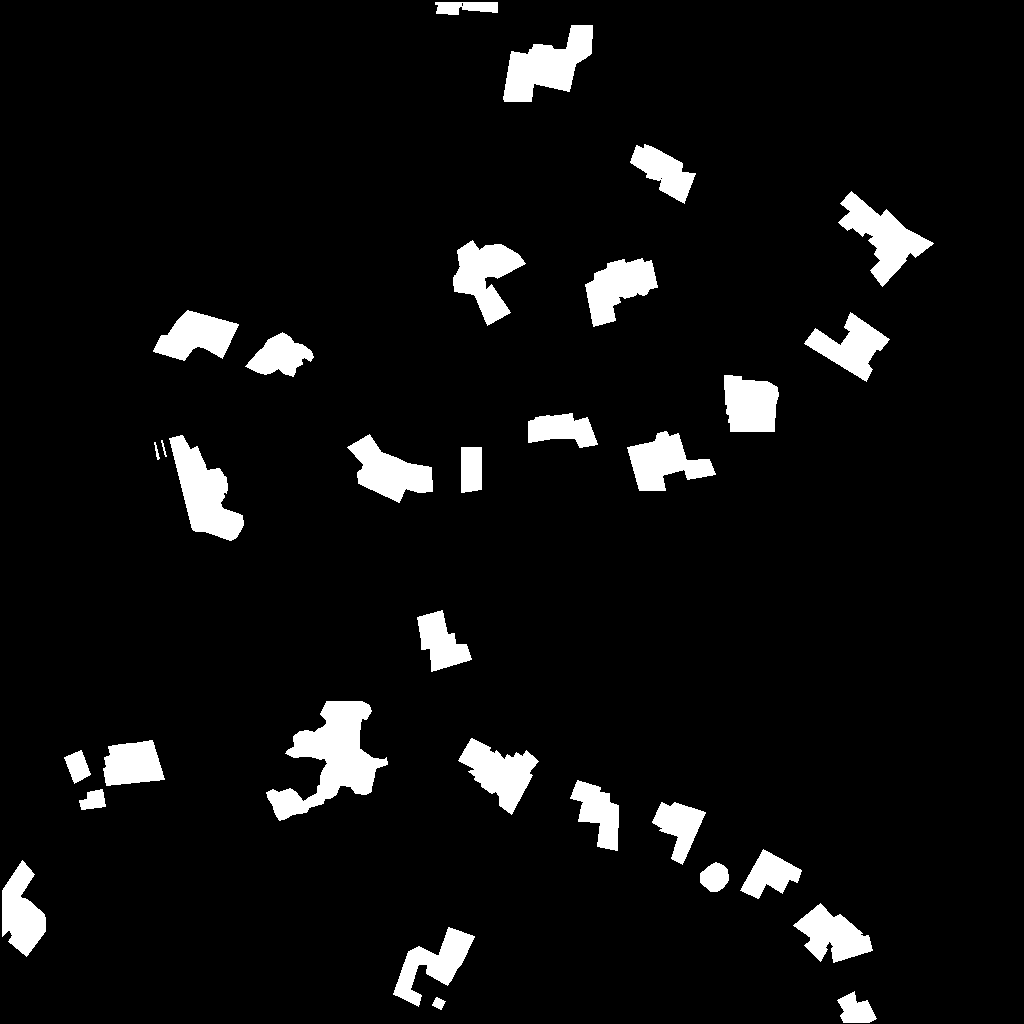

In [10]:
display(mask)

In [11]:
import numpy as np
pix = numpy.array(mask.getdata()).reshape(mask.size[0], mask.size[1], 3)

In [13]:
pix[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
np.unique(pix)

array([  0, 255])

In [15]:
pix.shape

(1024, 1024, 3)

In [16]:
pix.reshape(1024**2, 3).shape

(1048576, 3)

In [18]:
np.unique(pix.reshape(1024**2, 3), axis=0)

array([[  0,   0,   0],
       [255, 255, 255]])

In [19]:
from PIL import Image
import numpy as np
path_to_mask_value = '/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/masks/santa-rosa-wildfire_00000030_pre_disaster.png'
mask = Image.open(path_to_mask_value)
pix = numpy.array(mask.getdata()).reshape(mask.size[0], mask.size[1], 3)
np.unique(pix.reshape(1024**2, 3), axis=0)

array([[  0,   0,   0],
       [255, 255, 255]])

In [20]:
prediction='/home/catskills/Desktop/dataxv2/train/prediction/hurricane-florence_damage_00000028_prediction.png'

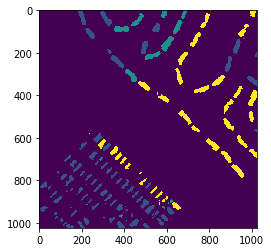

In [22]:
%matplotlib inline
import matplotlib.pylab as plt
pred = plt.imread(prediction)
plt.imshow(pred)

In [26]:
np.unique(pred)

array([0.        , 0.00392157, 0.00784314, 0.01568628], dtype=float32)

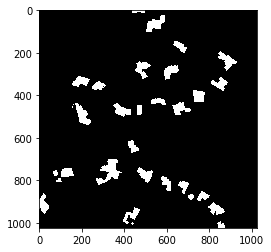

In [24]:
mask=plt.imread(path_to_mask_value)
plt.imshow(mask)

In [ ]:
pix = numpy.array(mask.getdata()).reshape(mask.size[0], mask.size[1], 3)
np.unique(pix.reshape(1024**2, 3), axis=0)